### Problem Statement
Given dataset named **`"student_scores.csv"`**, which includes records of the number of hours students studied and the marks they obtained. The dataset comprises the following columns:

- `hours:` The number of hours a student studied.
- `scores:` The marks obtained by the student.

built a polynomial regression model to predict the marks of students based on the number of hours they studied. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("student_scores.csv")

print(df.shape)

print("Dataset")
df.head()

(100, 2)
Dataset


,hours,scores
0,4.4,20.0
1,9.6,90.0
2,7.6,58.0
3,6.4,31.0
4,2.4,5.0


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


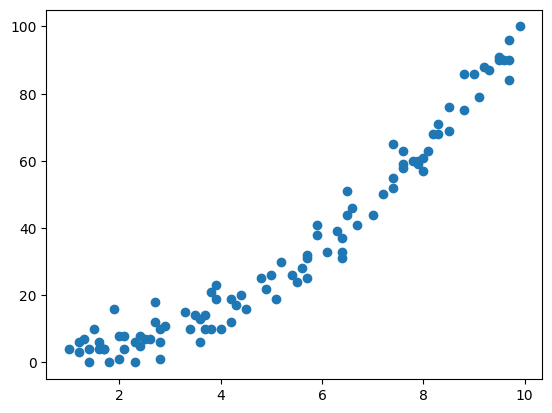

In [18]:
# Visualizing the relationship between the number of hours studied and the marks obtained
import matplotlib.pyplot as plt
plt.scatter(df.hours,df.scores)

In [4]:
X = df[['hours']]
y = df.scores

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
# Printing the model's coefficients and intercept
model.coef_, model.intercept_

(array([ 0.        , -4.4308579 ,  1.71393503, -0.03669951]),
 np.float64(7.691872832731249))

### Task 3: Model Evaluation
1. Make predictions on the test set using the trained model.
2. Evaluate the model using Mean Squared Error (MSE) and R-squared (R2) metrics.
3. Print the MSE and R2 values.

In [8]:
y_pred = model.predict(X_test_poly)

from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
mse,r2

(15.028613094999592, 0.9861559291060775)

In [9]:
import numpy as np
x_range = np.linspace(X['hours'].min(),X['hours'].max(),100).reshape(-1,1)
x_range

array([[1.        ],
       [1.08989899],
       [1.17979798],
       [1.26969697],
       [1.35959596],
       [1.44949495],
       [1.53939394],
       [1.62929293],
       [1.71919192],
       [1.80909091],
       [1.8989899 ],
       [1.98888889],
       [2.07878788],
       [2.16868687],
       [2.25858586],
       [2.34848485],
       [2.43838384],
       [2.52828283],
       [2.61818182],
       [2.70808081],
       [2.7979798 ],
       [2.88787879],
       [2.97777778],
       [3.06767677],
       [3.15757576],
       [3.24747475],
       [3.33737374],
       [3.42727273],
       [3.51717172],
       [3.60707071],
       [3.6969697 ],
       [3.78686869],
       [3.87676768],
       [3.96666667],
       [4.05656566],
       [4.14646465],
       [4.23636364],
       [4.32626263],
       [4.41616162],
       [4.50606061],
       [4.5959596 ],
       [4.68585859],
       [4.77575758],
       [4.86565657],
       [4.95555556],
       [5.04545455],
       [5.13535354],
       [5.225

In [10]:
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


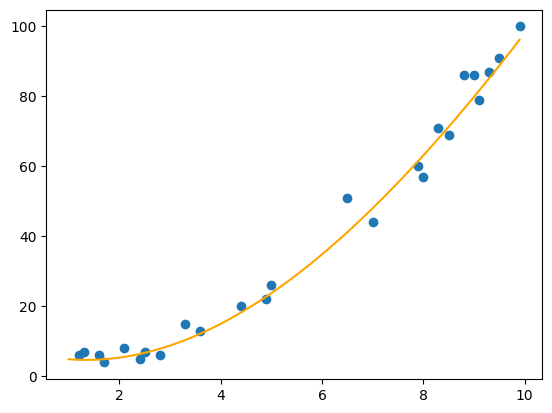

In [11]:
plt.scatter(X_test['hours'],y_test)
plt.plot(x_range,y_range_pred,color='orange')

### Checking with Linear Regression model

In [12]:
#Linear Regression model

model1 = LinearRegression()

model1.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
model1.coef_,model.intercept_

(array([10.22993889]), np.float64(7.691872832731249))

In [14]:
model1.score(X_test,y_test)

0.9277810239636578

In [16]:
y_range = model1.predict(x_range)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


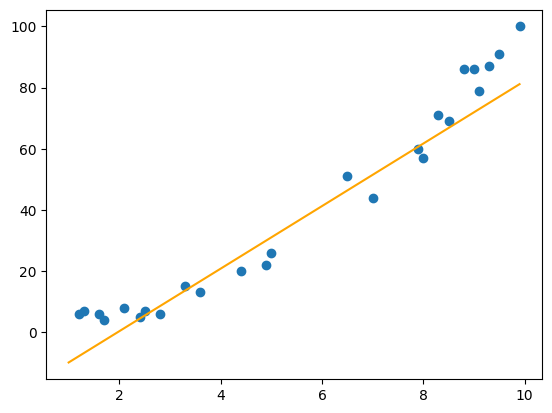

In [17]:
plt.scatter(X_test['hours'],y_test)
plt.plot(x_range,y_range,color='orange')

* Insights
  - In both graph we can clearly see we got best fit line in polynomial regression model
  - Hence accuracy increased from 92% ==> 98%